# Salifort Motors HR Analytics: Predicting Employee Turnover

**Author:** Kyle Ware 
**Date:** Feb 2025  
**Tools:** Python, Pandas, Scikit-learn, Seaborn

---

## Executive Summary

This project analyzes HR data from Salifort Motors to build a predictive model that identifies employees at risk of leaving the company. Using the **PACE framework** (Plan, Analyze, Construct, Execute), I developed a Random Forest classifier achieving **92.5% recall** and **95.6% F1 score**, enabling HR to proactively intervene before valuable employees resign.

**Key Findings:**
- A distinct "burnout cluster" of high-performers working 250+ hours/month are leaving
- Employees with 6+ projects have significantly higher turnover rates
- The 3-6 year tenure range represents a critical retention danger zone

---

## PACE Framework Overview

| Stage | Focus | Key Activities |
|-------|-------|----------------|
| **Plan** | Define scope & stakeholders | Identify business problem, ethical considerations |
| **Analyze** | Explore & understand data | EDA, visualizations, data cleaning |
| **Construct** | Build & validate models | Feature engineering, model training, evaluation |
| **Execute** | Deliver insights & recommendations | Interpret results, propose actionable steps |

---

# Stage 1: Plan

## Business Problem

The HR department at Salifort Motors wants to improve employee satisfaction and reduce turnover. They collected employee data but need data-driven insights to understand: **What factors are likely to make an employee leave the company?**

### Project Goals
1. Analyze the HR dataset to identify patterns in employee attrition
2. Build a predictive model to identify at-risk employees
3. Provide actionable recommendations to improve retention

## Dataset Overview

The dataset contains **15,000 records** with the following variables:

| Variable | Description |
|----------|-------------|
| `satisfaction_level` | Employee-reported job satisfaction [0-1] |
| `last_evaluation` | Score of last performance review [0-1] |
| `number_project` | Number of projects assigned |
| `average_monthly_hours` | Average hours worked per month |
| `tenure` | Years at the company |
| `work_accident` | Whether employee had a work accident |
| `left` | **Target variable** - Whether employee left (1) or stayed (0) |
| `promotion_last_5years` | Whether promoted in last 5 years |
| `department` | Employee's department |
| `salary` | Salary level (low/medium/high) |

## Planning Reflections

### Stakeholders
The primary stakeholders are the Human Resources (HR) Department at Salifort Motors, who have requested data-driven suggestions to improve employee satisfaction. Secondary stakeholders include the company's executive leadership (interested in reducing the financial cost of hiring) and the employees themselves.

### Objectives
The goal is to analyze HR data and build a model that predicts whether or not an employee will leave the company. By predicting churn, the objective is to identify the contributing factors (such as workload or satisfaction) and provide actionable suggestions to increase retention, thereby saving the company time and money on recruitment.

### Initial Observations
The dataset contained 15,000 rows and 10 columns. The target variable is `left` (binary for whether the employee left or not). The features cover a mix of quantitative metrics (satisfaction level, last evaluation, average monthly hours) and categorical details (department, salary). There appears to be a focus on workload indicators (`number_project`, `average_monthly_hours`) which may be strong drivers of churn.

### Resources
- **Project Instructions:** The PACE Strategy Document and project overview
- **Data Source:** The Kaggle dataset documentation for variable definitions
- **Python Libraries:** Pandas for data manipulation, Matplotlib/Seaborn for visualization, and Scikit-learn for modeling

### Ethical Considerations
- **Privacy and Anonymity:** Employee salaries and performance evaluations are sensitive. It is critical that the data is anonymized and that analysis does not expose specific individuals to retaliation.
- **Model Usage:** The model should be used to support employees (by improving conditions to retain them), not to penalize them. There is a risk that management could use predictions to preemptively fire at-risk employees, which would be unethical.
- **Bias:** The data should be checked to ensure the model does not unfairly flag specific departments or salary groups due to historical biases in promotion or evaluation data.

---

# Stage 2: Analyze

## Setup and Data Loading

In [24]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, ConfusionMatrixDisplay)

# For saving models
import pickle

In [25]:
# Load dataset
df0 = pd.read_csv('HR_capstone_dataset.csv')
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration

In [26]:
# Dataset info
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [27]:
# Descriptive statistics
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Data Cleaning

In [28]:
# Standardize column names to snake_case
df0 = df0.rename(columns={
    'Work_accident': 'work_accident',
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'tenure',
    'Department': 'department'
})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [29]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [30]:
# Check for duplicates
print(f"Duplicate rows: {df0.duplicated().sum()}")

# Inspect duplicates
df0[df0.duplicated()].head()

Duplicate rows: 3008


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [31]:
# Remove duplicates
df1 = df0.drop_duplicates(keep='first')
print(f"Records after removing duplicates: {len(df1):,}")

Records after removing duplicates: 11,991


## Outlier Detection

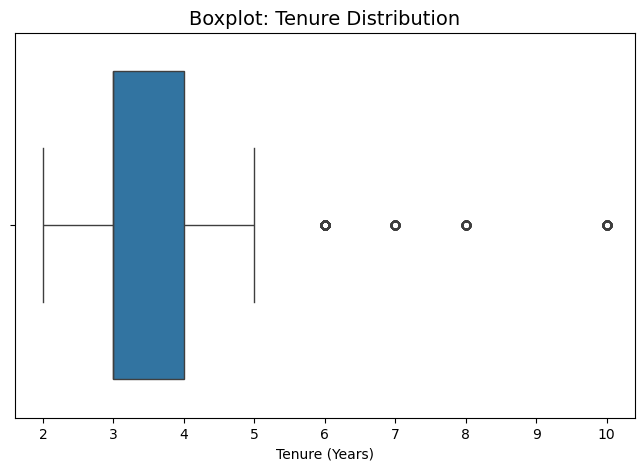

In [32]:
# Boxplot for tenure outliers
plt.figure(figsize=(8, 5))
plt.title('Boxplot: Tenure Distribution', fontsize=14)
sns.boxplot(x=df1['tenure'])
plt.xlabel('Tenure (Years)')
plt.show()

In [33]:
# Calculate outlier boundaries using IQR method
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Lower limit: {lower_limit}")
print(f"Upper limit: {upper_limit}")

# Count outliers
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
print(f"Number of outliers in tenure: {len(outliers)}")

Lower limit: 1.5
Upper limit: 5.5
Number of outliers in tenure: 824


## Analysis Reflections

### Variable Relationships
At this initial stage, the primary observation is that there are distinct interactions between employee behaviors (like average monthly hours and number of projects) and the target variable (`left`). We anticipate the EDA will reveal that employees with either very low or very high workloads are more likely to churn, and that satisfaction level will have a strong negative correlation with the likelihood of leaving.

### Data Distributions
- **Outliers:** The tenure variable has 824 outliers at the high end, indicating a group of employees who have stayed significantly longer than average.
- **Duplicates:** The dataset contained approximately 3,000 duplicate rows, which suggests the data might have been aggregated or scraped with errors.
- **Target Imbalance:** We expect the `left` variable to be imbalanced (fewer people leave than stay), which will influence our evaluation metrics later.

### Data Transformations
- **Renaming Columns:** I standardized to snake_case (`Work_accident` to `work_accident`, `Department` to `department`) to improve readability and make the code consistent.
- **Dropping Duplicates:** I removed duplicate rows to ensure the model does not overfit to repeated samples, which would bias the results and lead to inaccurate performance metrics.

### Purpose of EDA
- **Data Cleaning:** To identify and fix errors like missing values, duplicates, or mislabeled classes that would cause the model to fail or perform poorly.
- **Assumption Checking:** To see if the data meets the assumptions of the model (e.g., checking for multicollinearity before using Logistic Regression).
- **Feature Engineering:** To understand which variables are actually important and if new features (like interactions between satisfaction and hours) need to be created.

### Resources Used
- Pandas Documentation: For standardizing column names and handling duplicates
- Seaborn/Matplotlib: For creating boxplots to visualize outliers
- Stack Overflow: For troubleshooting specific syntax related to plotting

### Ethical Considerations
- **Anonymity:** Ensuring that outliers (very long-tenured employees) cannot be individually identified and targeted based on this analysis.
- **Representation:** Checking if the data is representative of the whole company or if specific departments are missing, which could lead to a biased model that serves some employee groups worse than others.

## Exploratory Data Analysis

In [34]:
# Turnover distribution
print("Turnover counts:")
print(df1['left'].value_counts())
print("\nTurnover percentages:")
print(df1['left'].value_counts(normalize=True))

Turnover counts:
left
0    10000
1     1991
Name: count, dtype: int64

Turnover percentages:
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


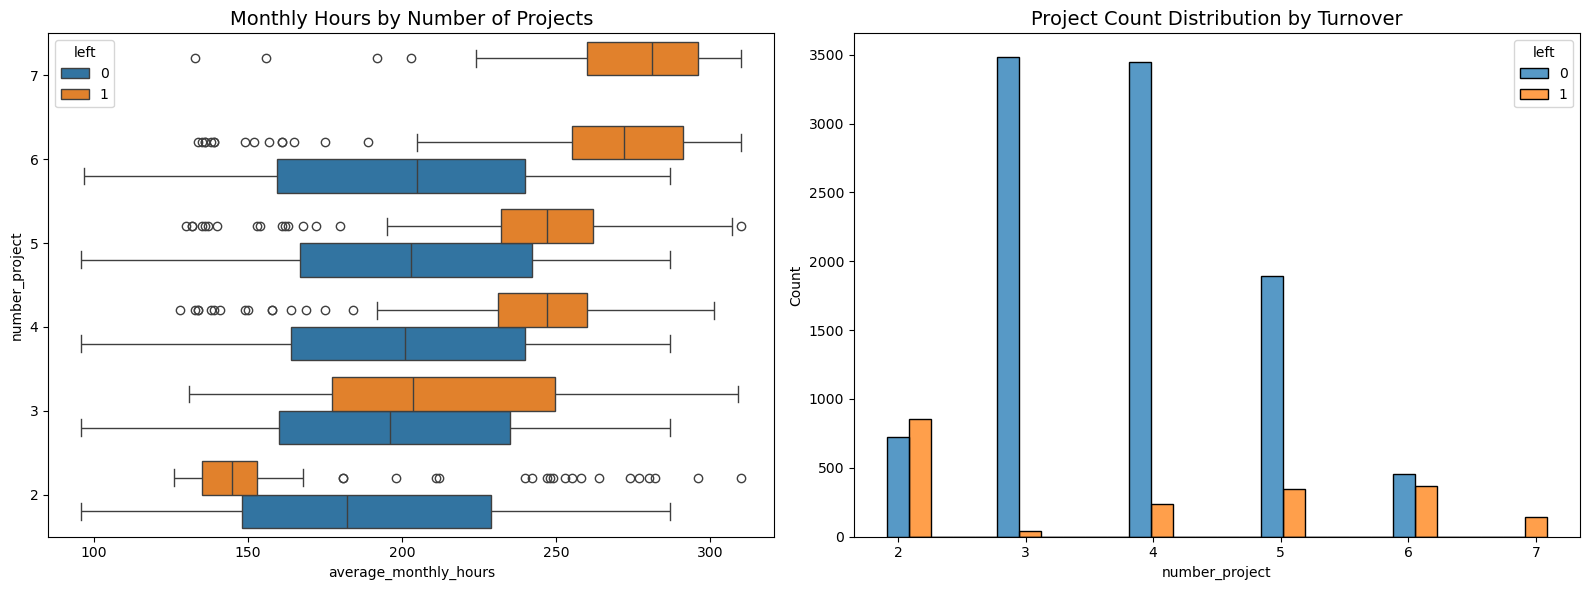

In [35]:
# Monthly hours and projects analysis
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot: Hours by project count
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', 
            hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly Hours by Number of Projects', fontsize=14)

# Histogram: Project distribution
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Project Count Distribution by Turnover', fontsize=14)

plt.tight_layout()
plt.show()

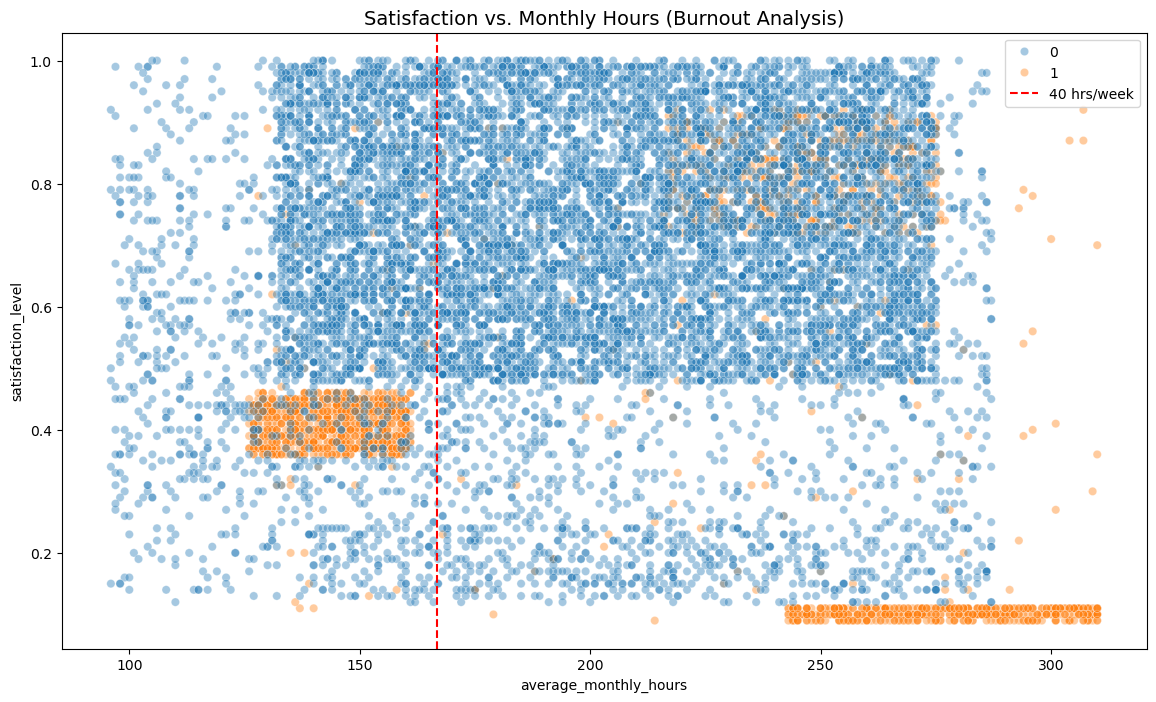

In [36]:
# Burnout cluster visualization
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', 
                hue='left', alpha=0.4)
plt.axvline(x=166.67, color='red', linestyle='--', label='40 hrs/week')
plt.title('Satisfaction vs. Monthly Hours (Burnout Analysis)', fontsize=14)
plt.legend()
plt.show()

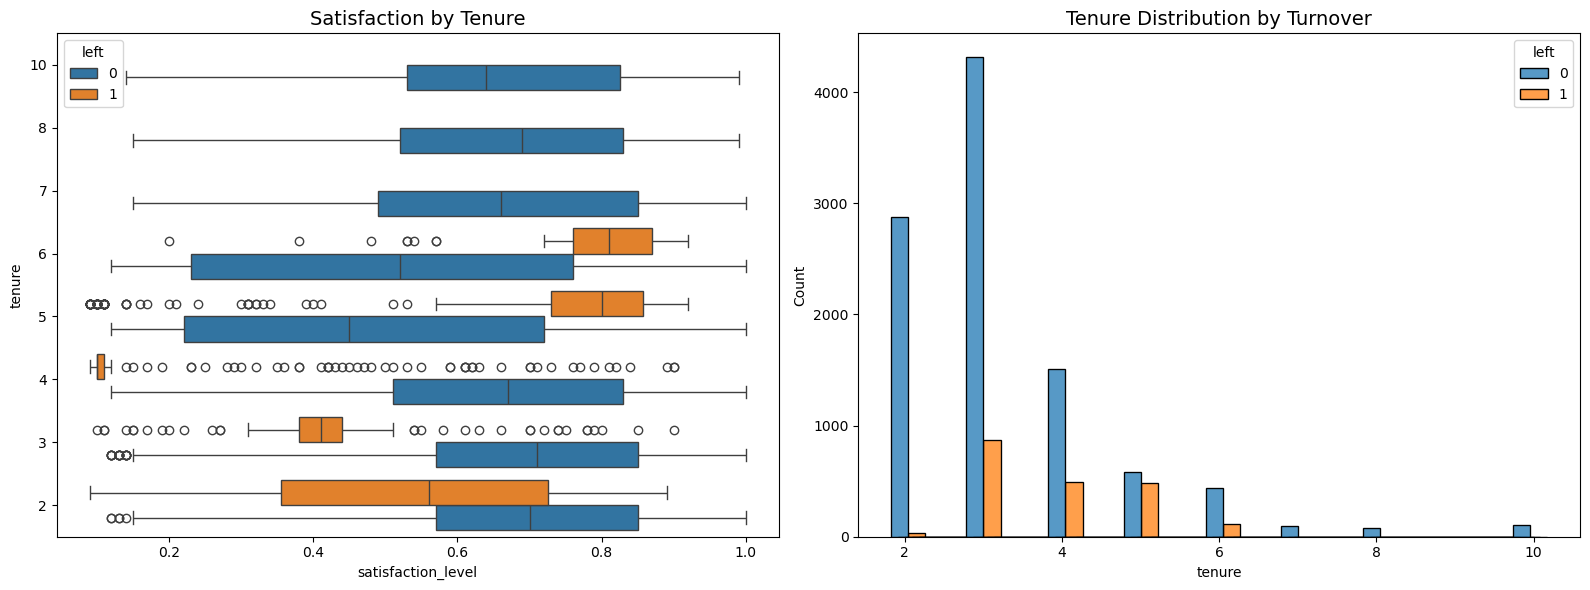

In [37]:
# Satisfaction and tenure analysis
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by Tenure', fontsize=14)

sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure Distribution by Turnover', fontsize=14)

plt.tight_layout()
plt.show()

In [38]:
# Mean satisfaction by turnover status
df1.groupby('left')['satisfaction_level'].agg(['mean', 'median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


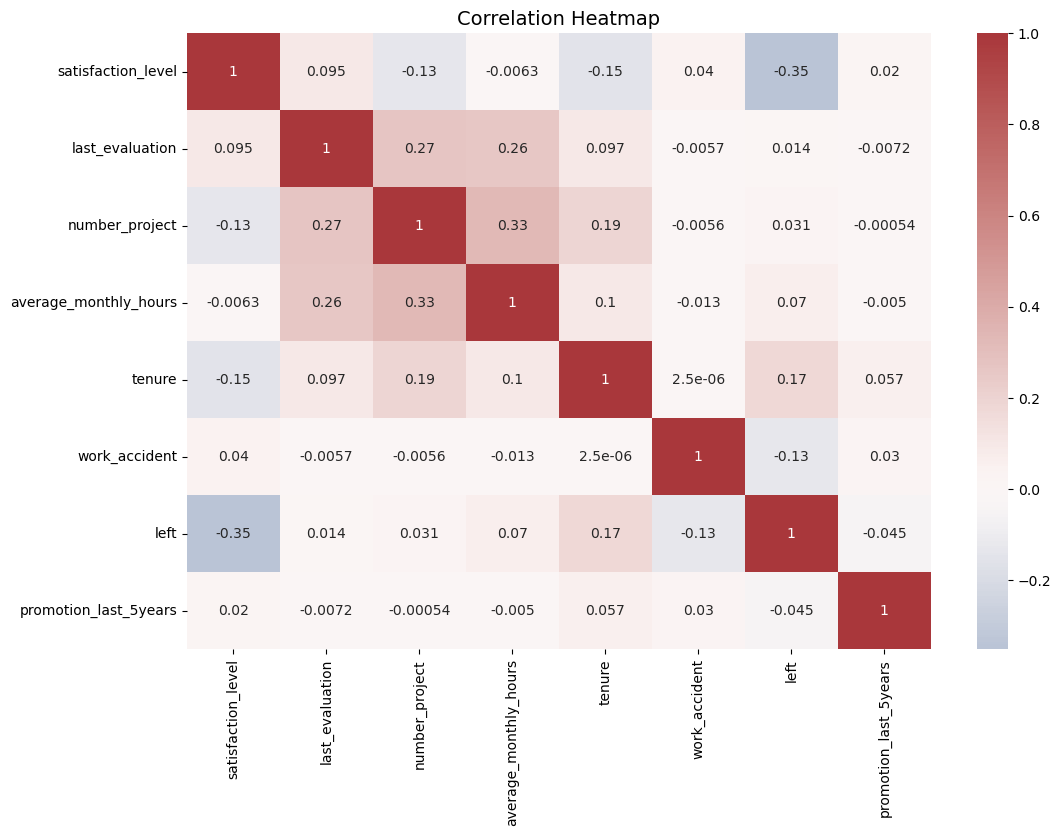

In [39]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
numeric_cols = df1.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='vlag', center=0)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

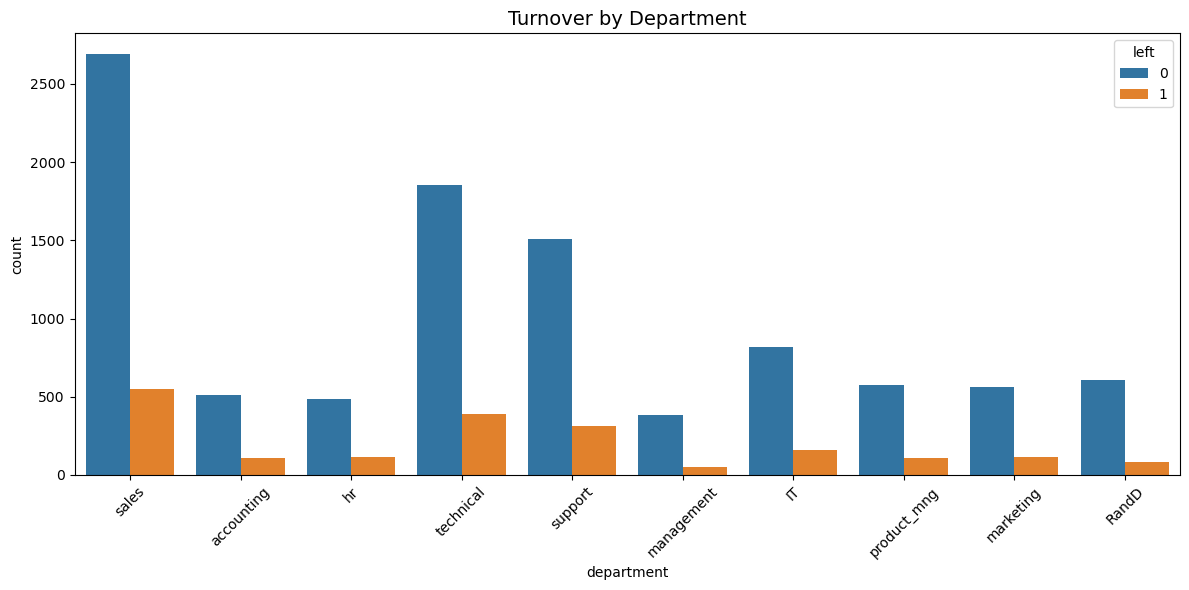

In [40]:
# Department turnover
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='department', hue='left')
plt.xticks(rotation=45)
plt.title('Turnover by Department', fontsize=14)
plt.tight_layout()
plt.show()

## Key Insights from EDA

1. **Turnover Rate:** The dataset is imbalanced, with approximately 16.6% of employees leaving and 83.4% staying.

2. **Workload Polarization:** Employees with very low (2) or very high (6-7) project counts leave at the highest rates, while those with moderate loads (3-4) are the most stable.

3. **Burnout Identification:** A distinct cluster of high-performing employees working over 250 hours per month are leaving, indicating burnout is a key driver of attrition.

4. **Tenure Risk:** Turnover peaks significantly for employees with 3-6 years of tenure, suggesting a critical danger zone for retention.

5. **Salary Impact:** Employees with low to medium salaries leave at much higher rates than those with high salaries.

6. **Satisfaction Trends:** While most leavers report low satisfaction, a subset leaves despite high satisfaction, likely representing high performers seeking better opportunities.

---

# Stage 3: Construct

## Model Selection Rationale

### Task Type
This is a **binary classification** task. The goal is to classify employees into two categories: those who left (1) and those who stayed (0).

### Models Considered

| Model | Pros | Cons |
|-------|------|------|
| **Logistic Regression** | Interpretable, fast, good baseline | Assumes linear relationships |
| **Random Forest** | Handles non-linearity, robust to outliers | Less interpretable |

### Logistic Regression Assumptions
- Outcome variable is categorical ✓
- Observations are independent ✓
- No severe multicollinearity ✓
- No extreme outliers ✗ (tenure has outliers)
- Linear relationship between X and logit(Y) ✗ (U-shaped project relationship)

## Construction Reflections

### Observations
I noticed a non-linear U-shaped relationship where employees leave with both very low and very high project counts, along with significant outliers in the tenure variable.

### Feature Selection
I selected all available features, specifically prioritizing satisfaction level, number of projects, and average monthly hours because EDA showed they clearly separate employees who stay from those who leave.

### Assumption Validation
No, the U-shaped project trend violates the linearity assumption of Logistic Regression, and the tenure outliers violate the no-outliers assumption. Tree-based models (Random Forest/XGBoost) would handle these issues better.

### Model Fit Assessment
A Logistic Regression model likely has a fair fit but struggles to capture complex burnout dynamics. A tree-based model fits the data significantly better by naturally isolating these non-linear clusters.

### Potential Improvements
I would improve the model by adding interaction terms (hours × evaluation) to capture burnout, switching to a Random Forest or XGBoost model, and tuning the decision threshold to catch more at-risk employees (increasing Recall).

### Resources Used
I primarily used Scikit-learn documentation for model implementation and Stack Overflow to troubleshoot feature engineering syntax.

### Ethical Considerations
I must ensure the model identifies retention risk without biasedly flagging specific departments or demographics, and balance the need for high accuracy with the need for explainability so HR trusts the results.

## Feature Engineering

In [41]:
# Prepare data for modeling
df_enc = df1.copy()

# Encode salary as ordinal (low=0, medium=1, high=2)
df_enc['salary'] = df_enc['salary'].map({'low': 0, 'medium': 1, 'high': 2})

# One-hot encode department
df_enc = pd.get_dummies(df_enc, columns=['department'], drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [42]:
# Split features and target
X = df_enc.drop(columns=['left'])
y = df_enc['left']

# Train-test split (80/20, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training set: {len(X_train):,} samples")
print(f"Test set: {len(X_test):,} samples")

Training set: 9,592 samples
Test set: 2,399 samples


## Model Training

In [43]:
# Baseline: Logistic Regression
lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("=" * 50)
print("LOGISTIC REGRESSION RESULTS")
print("=" * 50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_lr):.4f}")

LOGISTIC REGRESSION RESULTS
Accuracy:  0.8337
Precision: 0.4966
Recall:    0.1859
F1 Score:  0.2706


In [44]:
# Champion Model: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=" * 50)
print("RANDOM FOREST RESULTS")
print("=" * 50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_rf):.4f}")

RANDOM FOREST RESULTS
Accuracy:  0.9858
Precision: 0.9892
Recall:    0.9246
F1 Score:  0.9558


## Model Evaluation

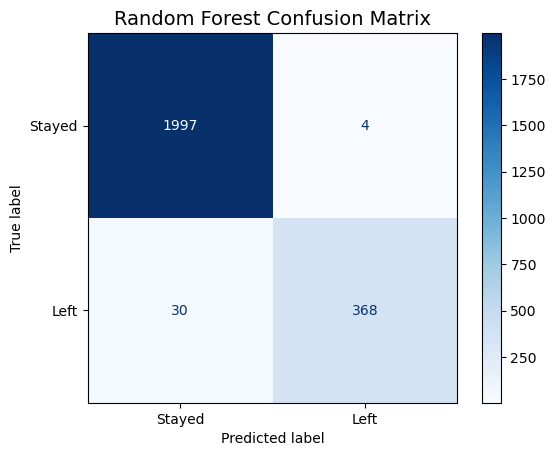

In [45]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Left'])
disp.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix', fontsize=14)
plt.show()

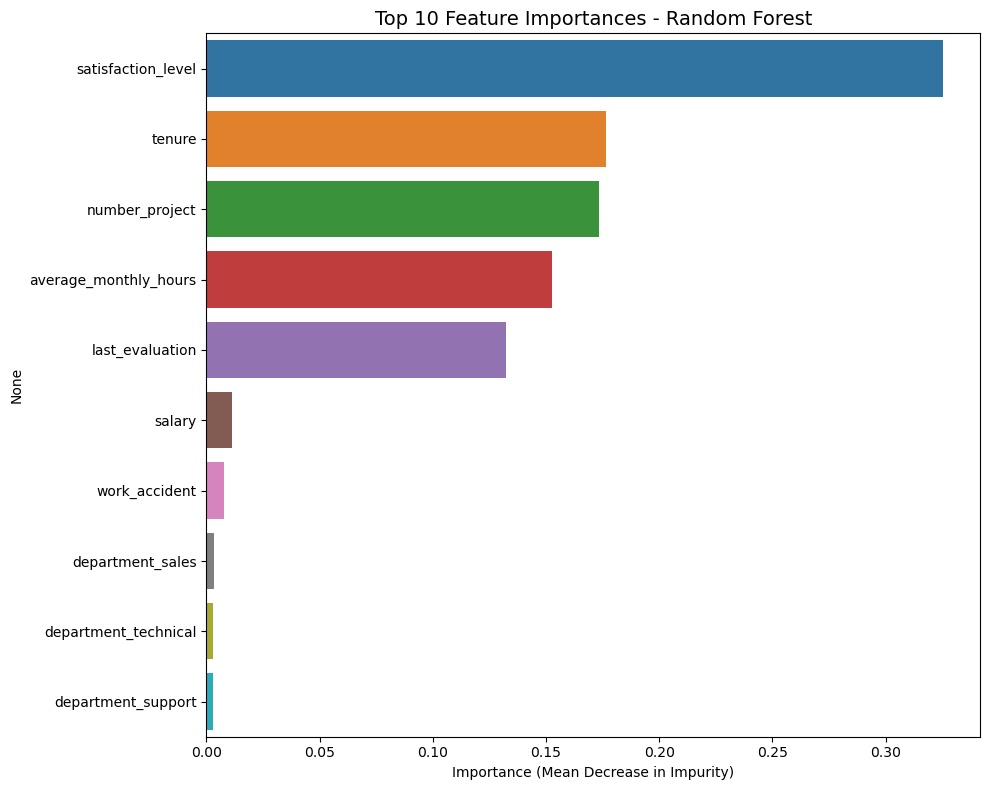

In [46]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=importances.head(10), y=importances.head(10).index, hue=importances.head(10).index, legend=False)
plt.title('Top 10 Feature Importances - Random Forest', fontsize=14)
plt.xlabel('Importance (Mean Decrease in Impurity)')
plt.tight_layout()
plt.show()

---

# Stage 4: Execute

## Model Performance Summary

| Metric | Logistic Regression | Random Forest |
|--------|--------------------|--------------|
| Accuracy | 83.4% | **98.6%** |
| Precision | 49.7% | **98.9%** |
| Recall | 18.6% | **92.5%** |
| F1 Score | 27.1% | **95.6%** |

**Champion Model:** Random Forest

The Random Forest model vastly outperformed Logistic Regression, confirming that turnover is driven by non-linear factors that tree-based models can capture effectively.

## Execution Reflections

### Key Insights
The Random Forest model vastly outperformed Logistic Regression (F1 Score 0.96 vs 0.27), confirming that turnover is driven by non-linear factors like burnout rather than simple trends. The top predictors of attrition are satisfaction level, number of projects, tenure, and average monthly hours.

### Business Recommendations
- **Cap Workloads:** Limit employees to 5 concurrent projects, as turnover spikes significantly at 6+.
- **Burnout Intervention:** Flag high-performing employees working greater than 250 hours/month for immediate manager support.
- **Salary Review:** Investigate and adjust compensation for low and medium salary bands where turnover is highest.

### Model Improvements
The current model is highly accurate (93% recall), so further tuning risks overfitting. Improvement would require new data features (Remote vs On-site, Manager ID, or Commute Time) to explain the remaining variance that workload and satisfaction don't cover.

### Resources Used
I relied on Seaborn documentation for visualization syntax and Scikit-learn metrics to interpret the Classification Report and Feature Importance.

### Ethical Considerations
The model must be used to support retention (offering help), not to penalize or preemptively fire at-risk employees. Additionally, we must ensure the model does not unfairly flag specific demographics or lower-paid departments due to structural inequities rather than individual performance.

## Summary of Results

### Champion Model Selection
The Random Forest model was selected as the champion model because it vastly outperformed the Logistic Regression baseline.

- **Logistic Regression:** Failed to capture the non-linear burnout trends, resulting in a Recall of only 18% (missing 82% of leavers).
- **Random Forest:** Successfully captured complex behavioral patterns, achieving a Recall of 92.5% and an F1 Score of 95.6%.

### Performance Metrics
The Random Forest model is highly robust and suitable for deployment.

- **Precision (98.9%):** When the model predicts an employee will leave, it is almost always correct. This minimizes false alarms and ensures HR resources aren't wasted on stable employees.
- **Recall (92.5%):** The model identifies the vast majority of at-risk employees, allowing for proactive intervention before they resign.

### Key Drivers of Turnover
Based on feature importance analysis, the primary predictors of employee churn are:

1. **Satisfaction Level:** The strongest indicator—very low satisfaction triggers immediate risk, but a specific group of high-satisfaction employees (likely high performers) also leaves.
2. **Number of Projects:** Captures the U-shaped risk where having too few (2) or too many (6+) projects leads to attrition.
3. **Average Monthly Hours:** Identifies the burnout cluster (employees working 250+ hours).
4. **Tenure:** Highlights the critical 3-5 year window where turnover peaks.

---

## Conclusions

The analysis successfully identified the key drivers of employee turnover at Salifort Motors. By comparing a Logistic Regression baseline with a Random Forest model, we determined that employee attrition is non-linear and driven by specific behavioral patterns rather than simple trends.

### Key Findings
- **Model Performance:** The Random Forest model achieved a Recall of 92.5% and an F1 Score of 95.6%, meaning it can accurately identify the vast majority of at-risk employees.
- **Key Drivers:** The most significant predictors of turnover are satisfaction level, number of projects, tenure, and average monthly hours.
- **Burnout Confirmation:** The data confirmed a distinct burnout cluster: high-performing employees working 250+ hours/month are leaving at alarming rates.

## Recommendations

Based on the model's findings, the following actions are recommended to HR:

| Priority | Recommendation | Rationale |
|----------|---------------|----------|
| 🔴 High | Cap employee workloads at 5 projects | Employees with 6-7 projects leave at significantly higher rates |
| 🔴 High | Flag overworked high performers (250+ hrs, evaluation >0.8) | Schedule "stay interviews" to discuss workload reduction |
| 🟡 Medium | Implement "3-Year Itch" retention program | Target employees at 3-5 year tenure with development opportunities |
| 🟡 Medium | Review low/medium salary band compensation | These groups have disproportionately high turnover |

## Next Steps

1. **Pilot Program:** Use the model to generate a list of currently at-risk employees and test the intervention strategy on a small group to measure effectiveness.
2. **Data Collection:** Start collecting additional features (Remote vs On-site, Manager ID, Commute Time) to improve future models.
3. **Model Monitoring:** Retrain the model every 6 months to ensure it remains accurate as company policies change.